<a href="https://colab.research.google.com/github/AmadoMaria/hands-on-supercomputing-with-parallel-computing/blob/master/Maria_Amado_e_Fernanda_Lisboa_report_handson_1_jupyter_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on 1: Portable Parallel Programming with

M. Amado$^1$, F. Lisboa$^1$

$^1$ Department of Computer Engenier – University SENAI CIMATEC, Salvador, Bahia, Brazil  

# Abstract

A partir da implementação do paralalelismo é possível reduzir a velocidade de execução de diversos algoritmos, uma vez que mais de uma tarefa pode ocorrer de forma silmutânea. Além disso, a implementação de tarefas assíncronas também tem um impacto importante na execução dos sistemas paralelos. Assim, essa prática teve o objetivo de otimizar a execução de um algoritmo de multiplicação de matrizes, a partir da aplicação dos conceitos de programação paralela e assíncrona utilizando o OpenMP, sendo possível perceber que existe um número de threads adequado para cada algoritmo, e que a versão paralelizada apresenta melhor desempenho que o código sequêncial.

# Introduction



A multiplicação de matrizes é uma das operações fundamentais da algebra linear, e é utilizada no desenvolvimento de inúmeros algorítmos. Assim, desenvolver algoritmos capazes de realizar essa tarefa de forma mais rápida viabiliza a resolução mais eficiente de problemas como encontrar a solução de sistemas lineares [1].

Dessa forma, a programação paralela, que tem o objetivo de melhorar a performance das aplicações a partir da execução de múltiplos processos [2], é uma estratégia que pode ser utilizada para otimizar a resolução das multiplicações de matrizes. Para isso, uma das alternativas mais simples para a implementação do paralalelismo é o OpenMp, que promete uma interface de fácil utilização, até para programadores inexperientes [3].

Além disso, o desenvolvimento de software voltado para programação paralalela, também precisa levar em consideração o acesso concorrente. Portando, um dos desafios é a obtenção de uma boa capacidade de resposta, o que leva processos sequenciais a serem divididos em tarefas assíncronas menores [4].

# Results and Discussion

###Sessão 1

código

In [ ]:
!sudo apt install libomp-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libomp5
Suggested packages:
  libomp-doc
The following NEW packages will be installed:
  libomp-dev libomp5
0 upgraded, 2 newly installed, 0 to remove and 20 not upgraded.
Need to get 239 kB of archives.
After this operation, 804 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp5 amd64 5.0.1-1 [234 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libomp-dev amd64 5.0.1-1 [5,088 B]
Fetched 239 kB in 0s (969 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
deb

In [ ]:
%%writefile mm.c
#include <stdio.h>
#include <stdlib.h>
#include <omp.h>

void initializeMatrix(int *matrix, int size)
{
  for (int i = 0; i < size; i++)
    for (int j = 0; j < size; j++)
      matrix[i * size + j] = rand() % (10 - 1) * 1;
}

void printMatrix(int *matrix, int size)
{
  for (int i = 0; i < size; i++)
  {
    for (int j = 0; j < size; j++)
      printf("%d\t", matrix[i * size + j]);
    printf("\n");
  }
  printf("\n");
}

int main (int argc, char **argv)
{

 double t1, t2;
 int max_thread;
 char filename[]="plot_";
 FILE *fp;

 int size = atoi(argv[1]);  
 int i, j, k;

 int  *A = (int *) malloc (sizeof(int)*size*size);
 int  *B = (int *) malloc (sizeof(int)*size*size);
 int  *C = (int *) malloc (sizeof(int)*size*size);

 initializeMatrix(A, size);
 initializeMatrix(B, size);
 max_thread = omp_get_max_threads();

 sprintf(filename, "%d.txt", max_thread);
 fp=fopen(filename, "a");
//  printf("max threads: %d\n", max_thread);
 t1 = omp_get_wtime();
 #pragma omp parallel for private(i, j, k)
    
    for(i = 0; i < size; i++)
      for(j = 0; j < size; j++)
        for(k = 0; k < size; k++)
          C[i * size + j] += A[i * size + k] * B[k * size + j];
 
 t2 = omp_get_wtime();
 printf("%d\t%f\n", size, t2-t1);
 fprintf(fp, "%d\t%f\n", size, t2-t1);
//  printMatrix(A,size);
//  printMatrix(B,size);
//  printMatrix(C,size);
 fclose(fp);
 return 0;

}


Writing mm.c


In [ ]:
!gcc mm.c -o mm -fopenmp
!./mm 100

100	0.004794


In [ ]:
%%writefile script.sh
#!/bin/sh
for j in $(seq 1 10)
do
 printf "threads:$j :\n"
 for i in 100 200 300 400 500 600 700 800 900 1000
  do
   printf "\033[1D$i :"
   OMP_NUM_THREADS=$j	./mm "$i"
  done
done

Writing script.sh


In [ ]:
!bash script.sh

threads:1 :
100 :100	0.005101
200 :200	0.040486
300 :300	0.162098
400 :400	0.369757
500 :500	0.856269
600 :600	1.513281
700 :700	3.591157
800 :800	3.950062
900 :900	8.453992
1000 :1000	10.374816
threads:2 :
100 :100	0.004737
200 :200	0.037468
300 :300	0.141422
400 :400	0.382075
500 :500	0.753983
600 :600	1.532480
700 :700	2.863001
800 :800	3.714425
900 :900	6.777755
1000 :1000	12.067284
threads:3 :
100 :100	0.005077
200 :200	0.038067
300 :300	0.149270
400 :400	0.364736
500 :500	0.788378
600 :600	1.504884
700 :700	2.832647
800 :800	3.703176
900 :900	6.531478
1000 :1000	11.277095
threads:4 :
100 :100	0.009304
200 :200	0.040190
300 :300	0.142849
400 :400	0.367263
500 :500	0.773637
600 :600	1.403740
700 :700	2.600411
800 :800	3.639115
900 :900	6.461032
1000 :1000	11.182773
threads:5 :
100 :100	0.004958
200 :200	0.039146
300 :300	0.144052
400 :400	0.367178
500 :500	0.772806
600 :600	1.370671
700 :700	2.529028
800 :800	3.560910
900 :900	6.498684
1000 :1000	11.068742
threads:6 :
100 :100	0.00

#### Tempo de execução com múltiplas threds


Durante a execução da prática, foi possível notar que a execução sequêncial do código mostrou-se mais demorada do que quando utilizamos o paralelismo para sua otimização. Assim, quanto maior o tamanha da matriz, maior o tempo de execução do programa, independente do número de threds utilizadas.

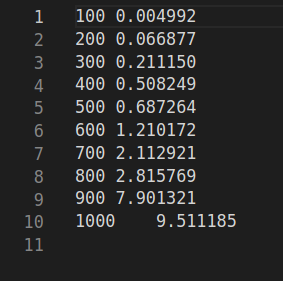
**Figura 1.** *Comparação do tempo de execução da multiplicação de matrizes de diferentes tamanhos, em um código sequêncial. A esquerda o tramanho da matriz e a direita o tempo de execução*

#### Melhor número de threds


Quando verificamos que a execução do código fazendo uso do paralalelismo realmente é mais eficiente, foi necessário identificar o melhor número de threds para execução do código. Se for atribuído um número de threds maior que o necessário, os benefícios adquiridos pela execução em paralelo são perdidos. Assim, uma execução com 5 threads mostrou-se suficiente segundo o gráfico apresentado na Figura 2.

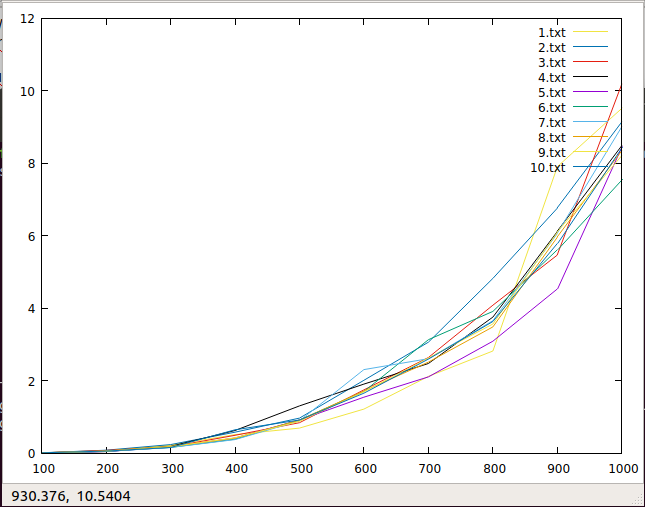

**Figura 2.** *Comparação do tempo de execução das matrizes com diferentes números de threds*


Portanto, a mesma comparação da Figura 1, em que as multiplicações foram realizadas de forma sequencial, pode ser observada na Figura 3, em que as multiplicações foram realizadas com 5 threds.

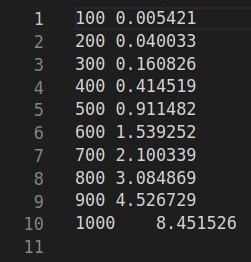

**Figura 3.** *Comparação do tempo de execução da multiplicação de matrizes de diferentes tamanhos, com 5 threads. A primeira coluna com o tamanho das matrizes multiplicadas e a segunda o tempo de execução da operação*

###Sessão 2

####Asynchronous Tasks

Diante do código executado, respondemos as seguintes questões:
* Whats does the code do from the compilation and execution of the previous code?
**answer**: Plota duas matrizes "ao mesmo tempo" (assincronamente), em que passa-se o tamanho das duas matrizes quadradas no primeiro argumento e a quantidade.
A primeira matriz sempre traz o valor 5 em todas as suas células.
A segunda matriz traz na primeira coluna o mesmo valor da anterior multiplicado por 10 e, na segunda coluna, multiplicado por 20.



**Figura 4.** *Output de saída para a entrada 10 2 do código executado*.

* How would it be possible to extend the code so that the five threads perform asynchronous tasks?

**answer**: Adicionando mais 'k's e condições de 'if' de acordo com o aumento de 'k's, sendo um if para cada id como já era feito anteriormente utilizando apenas duas threads assíncronas.

```c
int matrix[SIZE_MATRIX][SIZE_MATRIX], k1 = 10, k2 = 20, k3 = 30, k4 = 40, k5=50;
```

```c
#pragma omp parallel private(row, column)
  {
    int id = omp_get_thread_num();

    if(id == 0)
    {
      for(row = 0; row < n; row++)
        for(column = 0; column < block_size; column++)
          matrix[row][column] *= k1;
    }

    if(id == 1)
    {
      for(row = 0; row < n; row++)
        for(column = block_size; column < 2 * block_size; column++)
          matrix[row][column] *= k2;
    }

    if(id == 2)
    {
      for(row = 0; row < n; row++)
        for(column = 2 * block_size; column < 3 * block_size; column++)
          matrix[row][column] *= k3;
    }

    if(id == 3)
    {
      for(row = 0; row < n; row++)
        for(column = 3 * block_size; column < 4 * block_size; column++)
          matrix[row][column] *= k4;
    }

    if(id == 4)
    {
      for(row = 0; row < n; row++)
        for(column = 4 * block_size; column < 5 * block_size; column++)
          matrix[row][column] *= k4;
    }
  
  }
```



código

In [ ]:
%%writefile async_task.c
#include <stdio.h>
#include <stdlib.h>
#include <omp.h>
#define SIZE_MATRIX 10

int main(int argc, char **argv)
{
  int n = atoi(argv[1]);
  int block_size = atoi(argv[2]);
  int matrix[SIZE_MATRIX][SIZE_MATRIX], k1 = 10, k2 = 20, k3 = 30, k4 = 40, k5=50;
  int i, j, row, column;

  for(i = 0; i < n; i++)
  {
    for(j = 0; j < n; j++)
    {
      matrix[i][j] = 5;
      printf("%d\t", matrix[i][j]);
    }
    printf("\n");
  }

  printf("\n\n");

  omp_set_num_threads(5);

  #pragma omp parallel private(row, column)
  {
    int id = omp_get_thread_num();

    if(id == 0)
    {
      for(row = 0; row < n; row++)
        for(column = 0; column < block_size; column++)
          matrix[row][column] *= k1;
    }

    if(id == 1)
    {
      for(row = 0; row < n; row++)
        for(column = block_size; column < 2 * block_size; column++)
          matrix[row][column] *= k2;
    }

    if(id == 2)
    {
      for(row = 0; row < n; row++)
        for(column = 2 * block_size; column < 3 * block_size; column++)
          matrix[row][column] *= k3;
    }

    if(id == 3)
    {
      for(row = 0; row < n; row++)
        for(column = 3 * block_size; column < 4 * block_size; column++)
          matrix[row][column] *= k4;
    }

    if(id == 4)
    {
      for(row = 0; row < n; row++)
        for(column = 4 * block_size; column < 5 * block_size; column++)
          matrix[row][column] *= k4;
    }
  
  }

  for(i = 0; i < n; i++)
  {
    for(j = 0; j < n; j++)
      printf("%d\t", matrix[i][j]);
    printf("\n");
  }

  return 0;
}

In [ ]:
!gcc async_task.c -o async_task -fopenmp -lm
!./async_task 10 2

# Conclusions

Com a prática realizada, foi possível observar o impacto que a paralelização dos processos tem sobre um algoritmo de alto custo computacional, como a multiplicação de matrizes. Também observamos a importância de utilizar o melhor número de threads para execução do código a fim de reduzir o tempo dos processos, e a instabilidade quanto ao tempo de execução e essa quantidade.

# References

[1] Robinson, S. (2005). Toward an optimal algorithm for matrix multiplication. SIAM news, 38(9), 1-3.

[2] Kasim, H., March, V., Zhang, R., & See, S. (2008). Survey on Parallel Programming Model. Network and Parallel Computing, 266–275. doi:10.1007/978-3-540-88140-7_24 

[3] Park, I., Voss, M. J., Kim, S. W., & Eigenmann, R. (2001). Parallel Programming Environment for OpenMP. Scientific Programming, 9(2-3), 143–161. doi:10.1155/2001/195437

[4] Deligiannis, P., Donaldson, A. F., Ketema, J., Lal, A., & Thomson, P. (2015). Asynchronous programming, analysis and testing with state machines. Proceedings of the 36th ACM SIGPLAN Conference on Programming Language Design and Implementation - PLDI 2015. doi:10.1145/2737924.2737996 